<h2>PRETRAITEMENT DES DONNEES</h2>

In [1]:
import os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
import glob 
from PIL import Image
from skimage.color import rgb2gray, rgba2rgb


In [3]:
from rembg import remove 


In [4]:
from skimage import data, color, exposure
from skimage.feature import hog
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

<h4 style="color:rgb(230, 79, 9);">0-Chargement de l'image </h4>

In [5]:
def chargement_images(folder_path):
    images = []
    labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            img = Image.open(os.path.join(folder_path, filename))
            
            if img is not None:
                images.append(img)
                
        labels.append(filename.split('_')[0])
        
    return  images, labels

<h4 style="color:rgb(230, 79, 9);">1-Redimensionnement des images </h4>

<h5 style="color:red;"> <strong>!</strong> NOTE IMPORTANTE 1 :</h5>
<p>pour utiliser la methode redimensionner_image il faut preciser le chemin
du dossier ou se trouve les images , preciser le chemin du dossier out l'image redimensionner sera stocker 
. Il faudra aussi preciser le nom que prendra le fichier en sortie et en fin la taille 
que vous voulez attribuer a votre image</p>

In [6]:

# =======( fonction permettant de redimentionner une image )========
def redimensionner_image(folder_path_input, nouvelle_largeur, nouvelle_hauteur, folder_path_output, output_name):    
    image_names = getAllImageFIle(folder_path_input)
    
    images_redim = []
    i = 0
    for image_name in image_names:
        
        image = Image.open(image_name)
        image_redimensionnee = image.resize((nouvelle_largeur, nouvelle_hauteur))
        image_name = image_name.split("/")[len(image_name.split("/")) - 1]
        image_name = output_name + "_" + str(i) + "." + ".png"
        # image_name = output_name + "_" + str(i) + "." + image_name.split(".")[1]
        new_path = folder_path_output + "/" + image_name
        print(new_path)

        image_redimensionnee.save(new_path)
        i += 1
        images_redim.append(image_redimensionnee)
        
    return images_redim

# =======( fonction permettant de recuperer toutes les images presentes dans un dossier )=======
def getAllImageFIle(path_folder):
    
    images = glob.glob(os.path.join(path_folder, "*.jpg"))+\
                glob.glob(os.path.join(path_folder, "*.jpeg"))+\
                glob.glob(os.path.join(path_folder, "*.png"))+\
                glob.glob(os.path.join(path_folder, "*.pgm"))+\
                glob.glob(os.path.join(path_folder, "*.bpm"))+\
                glob.glob(os.path.join(path_folder, "*.ppm"))+\
                glob.glob(os.path.join(path_folder, "*.JPG"))+\
                glob.glob(os.path.join(path_folder, "*.JPEG"))

    return images

<h3 style="color:rgb(230, 79, 9);">2-Suppression de l'arriere-plan de l'image</h3>

<h5 style="color:red;"> <strong>!</strong> NOTE IMPORTANTE 2:</h5>
<p>pour utiliser la methode remove_background il faut preciser le chemin
du dossier ou se trouve les images , preciser le chemin du dossier ou l'image sans fond  sera stocker 
. Il faudra aussi preciser le nom que prendra le fichier en sortie.</p>

In [7]:

def remove_background(folder_path_input, folder_path_output, output_name):
    
    image_names = getAllImageFIle(folder_path_input)
    
    images_bg_remv = []
    i = 0
    for image_name in image_names:
        
        image = Image.open(image_name)
        image_sans_bg = remove(image)
        image_name = image_name.split("/")[len(image_name.split("/")) - 1]
        image_name = output_name + "_" + str(i) + "." + "png"
        new_path = folder_path_output + "/" + image_name
        # print(new_path)

        image_sans_bg.save(new_path)
        i += 1
        images_bg_remv.append(image_sans_bg)
        
    return images_bg_remv
    




<h3 style="color:rgb(230, 79, 9);">2-Conversion en niveau de gris</h3>

<h5 style="color:red;"> <strong>!</strong> NOTE IMPORTANTE 3:</h5>
<p>pour utiliser la methode conversion_en_gris il faut juste passer l'image en paramettre.</p>

In [8]:
def conversion_en_gris(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

<h3 style="color:rgb(230, 79, 9);">3-Normalisation des valeurs de pixels</h3>

<h5 style="color:red;"> <strong>!</strong> NOTE IMPORTANTE 3:</h5>
<p>pour utiliser la methode normalisation il faut juste passer l'image en paramettre.</p>

In [9]:
def normalisation(image):
    return image / 255.0

<h3 style="color:rgb(230, 79, 9);">4-Extractions de caracteristiques</h3>

<p> Pour l'implementation de notre modele de classification nous allons utiliser <br>
plusieurs technique d'extraction de caracteristiques a savoir :  </p>
<h4 style="color:white;"> 1- Concatenation des vecteurs de caracteristiques</h4>
<p>Ici il est question d'extraire les caracteristiques de l'image en utilisant plusieurs approches
et par la suite les contatenes pour obtenir un unique vecteur de caracteristiques</p>
<h4 style="color:white;"> 1- Utilisation de plusieurs methodes et selection de la meilleur</h4>
<p> Ici il est question d'effectuer l'entrainement plusieurs approches et choisir celle qui produit de
bonne performance </p>


<h4 style="color:rgb(230, 79, 9);">a-utilisation de <strong>HOG</strong> pour l'extraction de caracteristique</h4>

<h4 style="color:rgb(230, 79, 9);">b- execution du processus d'extraction</h4>

In [10]:
# ======( importation des donnees )===========

chemin_vers_images1 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/ananas-sans-fond"

images1, labels1 = chargement_images(chemin_vers_images1)
# images1[1]


In [11]:
chemin_vers_images2 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/avocat-sans-fond"

images2, labels2 = chargement_images(chemin_vers_images2)
# images2[1]

In [12]:
chemin_vers_images3 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/bananes-sans-fond"

images3, labels3 = chargement_images(chemin_vers_images3)
# images3[1]

In [13]:
chemin_vers_images4 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/mangues-sans-fond"

images4, labels4 = chargement_images(chemin_vers_images4)
# images4[1]


In [14]:
chemin_vers_images5 = "TRAITEMENT_DES_DONNEES/image/image-sans-fond/pasteques-sans-fond"

images5, labels5 = chargement_images(chemin_vers_images5)
# images5[1]


#### concatenation des images

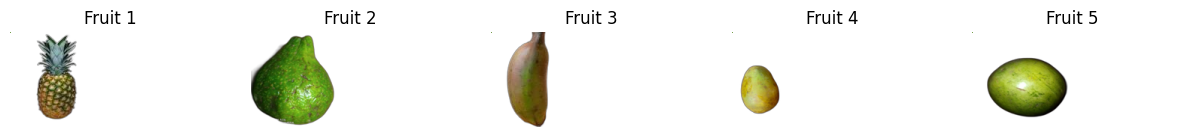

In [15]:
# Créer une figure avec 5 sous-plots

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
list_images = []
list_images.append(images1[0])
list_images.append(images2[0])
list_images.append(images3[0])
list_images.append(images4[0])
list_images.append(images5[0])
# Parcourir les images des fruits
i = 0
for image in list_images:
    # Charger l'image
    
    # Convertir l'image en tableau numpy
    image_array = np.array(image)
    
    # Afficher l'image dans le sous-plot correspondant
    axes[i].imshow(image_array)
    axes[i].axis('off')
    axes[i].set_title(f'Fruit {i+1}')
    
    # Extraire les histogrammes des canaux rouge, vert et bleu
    r_hist, _, _ = axes[i].hist(image_array[:, :, 0].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Rouge')
    g_hist, _, _ = axes[i].hist(image_array[:, :, 1].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Vert')
    b_hist, _, _ = axes[i].hist(image_array[:, :, 2].ravel(), bins=256, range=(0, 256), density=True, alpha=0.5, label='Bleu')
    
    i += 1
    
plt.show()

In [16]:
images = images1 + images2 + images3 + images4 + images5
labels = labels1 + labels2 + labels3 + labels4 + labels5

In [17]:
data = pd.DataFrame()
data["images"] = images
data["labels"] = labels

In [18]:
def extract_hog_features(image):

    if image.format != "PNG" :
        if image.shape[-1]  == 4:  # Si l'image a 4 canaux (RGBA), convertir en RGB
            image = rgba2rgb(image)
    else:
        image = rgba2rgb(image)
        
    gray_image = rgb2gray(image)
    features, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), visualize=True)
    return features, hog_image

In [19]:
# Extraction des caractéristiques HOG pour chaque image
hog_features_list = []
hog_images_list = []
for image in data["images"]:
    features, hog_image = extract_hog_features(image)
    hog_features_list.append(features)
    hog_images_list.append(hog_image)

# Conversion en tableaux numpy
hog_features = np.array(hog_features_list)
hog_images = np.array(hog_images_list)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [20]:
# print(data["images"].shape)

In [21]:

# print(hog_features.shape)

In [22]:
# print(X_test.shape)

In [23]:
# print(X_train.shape)

In [24]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 5)  # Valeurs de C à tester
train_scores_poly = []
test_scores_poly = []


for c in Cs:
    svm_model_poly = SVC(C=c, kernel='poly')
    svm_model_poly.fit(X_train, y_train)
    train_scores_poly.append(svm_model_poly.score(X_train, y_train))
    test_scores_poly.append(svm_model_poly.score(X_test, y_test))

In [25]:
# Prédiction sur l'ensemble de test
y_pred = svm_model_poly.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9746835443037974
Classification Report:
               precision    recall  f1-score   support

      ananas       0.97      0.94      0.96        35
      avocat       0.97      0.97      0.97        60
      banane       1.00      0.98      0.99        43
      mangue       0.96      0.98      0.97        49
    pasteque       0.98      1.00      0.99        50

    accuracy                           0.97       237
   macro avg       0.98      0.97      0.97       237
weighted avg       0.97      0.97      0.97       237



In [26]:
from sklearn.model_selection import learning_curve

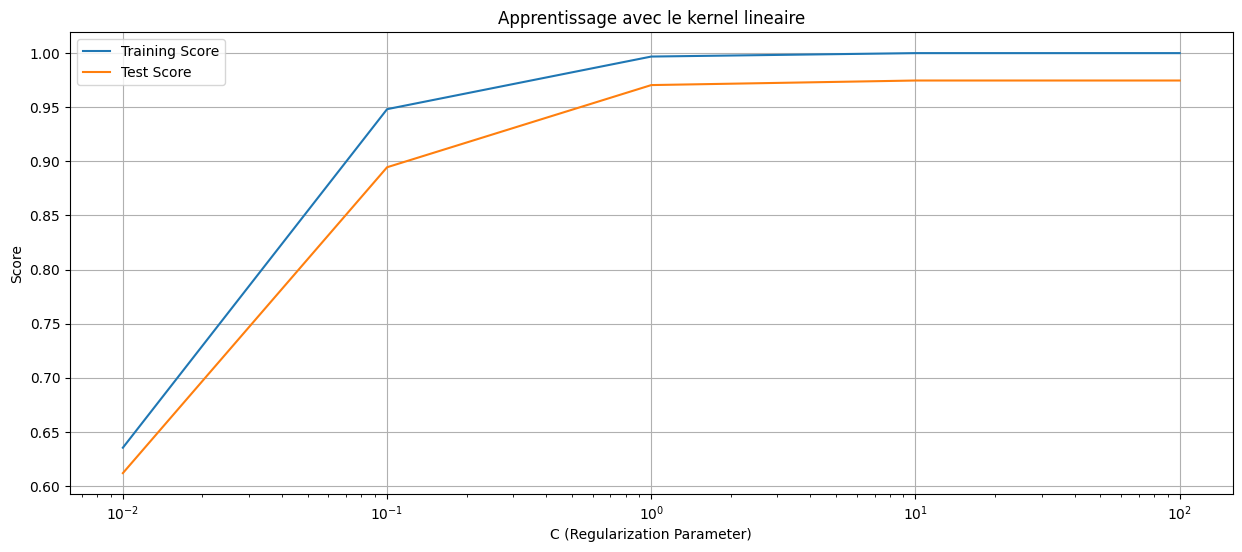

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_poly, label='Training Score')
plt.semilogx(Cs, test_scores_poly, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Apprentissage avec le kernel lineaire')
plt.legend()
plt.grid()
plt.show()

### utilisation de kernel gaussien 

In [28]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 5)  # Valeurs de C à tester
train_scores_linear = []
test_scores_linear = []


for c in Cs:
    svm_model_linear = SVC(C=c, kernel='linear')
    svm_model_linear.fit(X_train, y_train)
    train_scores_linear.append(svm_model_linear.score(X_train, y_train))
    test_scores_linear.append(svm_model_linear.score(X_test, y_test))
    

# Prédiction sur l'ensemble de test
y_pred = svm_model_linear.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.9662447257383966
Classification Report:
               precision    recall  f1-score   support

      ananas       0.91      0.91      0.91        35
      avocat       0.95      0.95      0.95        60
      banane       1.00      0.95      0.98        43
      mangue       0.96      1.00      0.98        49
    pasteque       1.00      1.00      1.00        50

    accuracy                           0.97       237
   macro avg       0.97      0.96      0.96       237
weighted avg       0.97      0.97      0.97       237



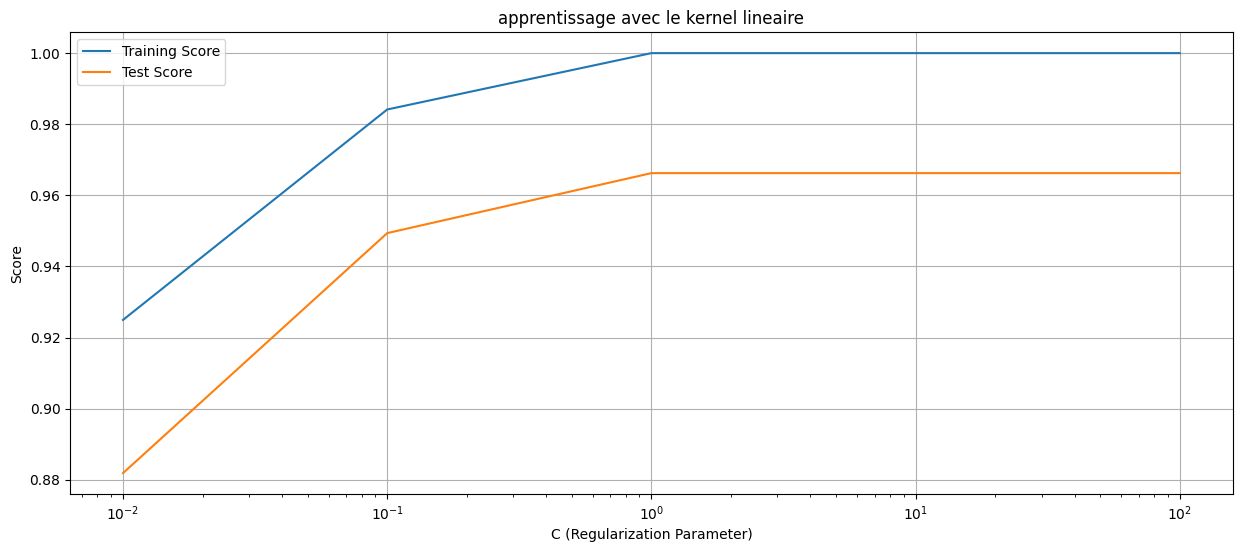

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_linear, label='Training Score')
plt.semilogx(Cs, test_scores_linear, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('apprentissage avec le kernel lineaire')
plt.legend()
plt.grid()
plt.show()

In [30]:
# Entraînement du modèle SVM
Cs = np.logspace(-2, 2, 5)  # Valeurs de C à tester
train_scores_poly = []
test_scores_poly = []


for c in Cs:
    svm_model_rbf = SVC(C=c, kernel='rbf')
    svm_model_rbf.fit(X_train, y_train)
    train_scores_poly.append(svm_model_rbf.score(X_train, y_train))
    test_scores_poly.append(svm_model_rbf.score(X_test, y_test))
    
    
# Prédiction sur l'ensemble de test
y_pred = svm_model_rbf.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9746835443037974
Classification Report:
               precision    recall  f1-score   support

      ananas       0.94      0.97      0.96        35
      avocat       0.97      0.97      0.97        60
      banane       1.00      0.95      0.98        43
      mangue       0.98      0.98      0.98        49
    pasteque       0.98      1.00      0.99        50

    accuracy                           0.97       237
   macro avg       0.97      0.97      0.97       237
weighted avg       0.98      0.97      0.97       237



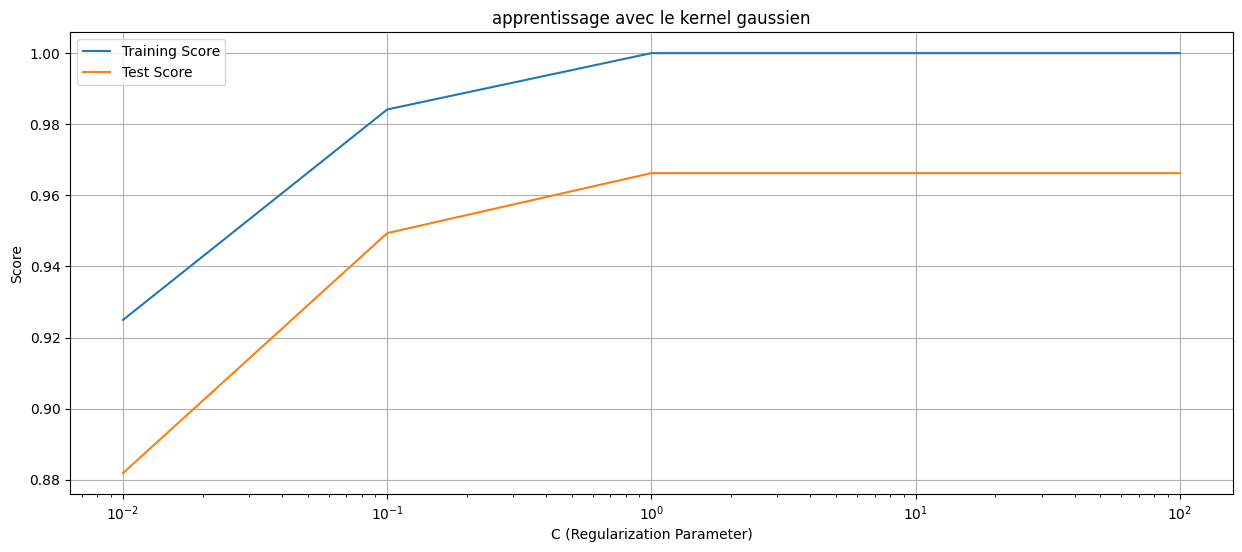

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.semilogx(Cs, train_scores_linear, label='Training Score')
plt.semilogx(Cs, test_scores_linear, label='Test Score')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('apprentissage avec le kernel gaussien')
plt.legend()
plt.grid()
plt.show()

### modele finale avec parametre optimale

In [32]:
svm_model = SVC(C=3.0, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=3.0)

In [33]:
from sklearn.model_selection import learning_curve

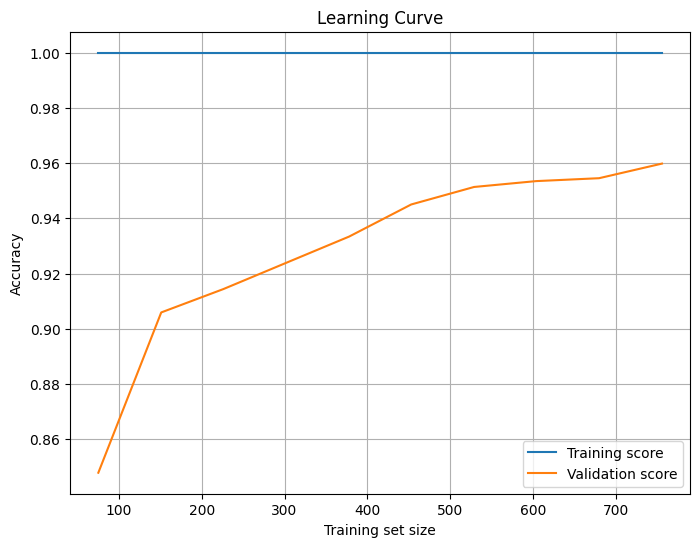

In [34]:
train_sizes, train_scores, validation_scores = learning_curve(
    svm_model, X_train, y_train, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [35]:
# Prédiction sur l'ensemble de test
y_pred = svm_model.predict(X_test)
# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9746835443037974
Classification Report:
               precision    recall  f1-score   support

      ananas       0.94      0.97      0.96        35
      avocat       0.97      0.97      0.97        60
      banane       1.00      0.95      0.98        43
      mangue       0.98      0.98      0.98        49
    pasteque       0.98      1.00      0.99        50

    accuracy                           0.97       237
   macro avg       0.97      0.97      0.97       237
weighted avg       0.98      0.97      0.97       237



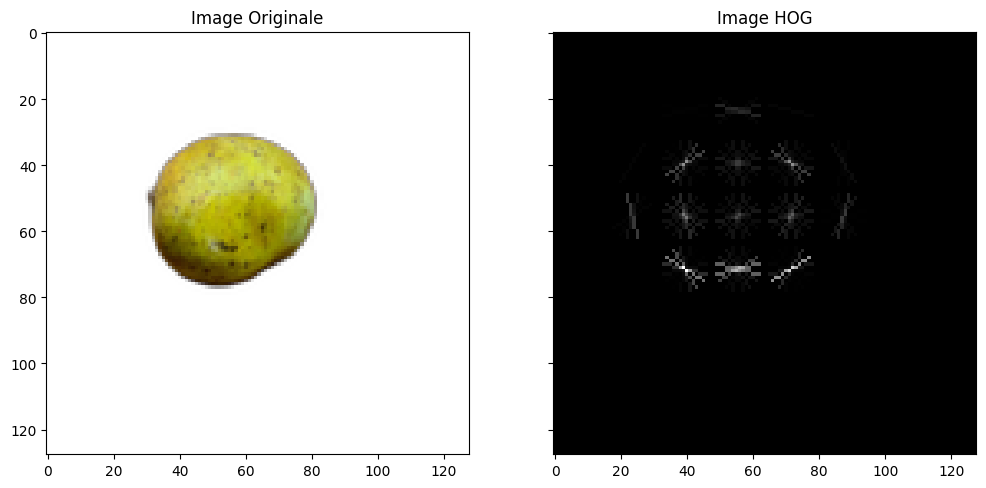

In [36]:
# Visualisation de quelques HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(data["images"][900], cmap='gray')
ax[0].set_title('Image Originale')
ax[1].imshow(hog_images_list[900], cmap='gray')
ax[1].set_title('Image HOG')
plt.show()

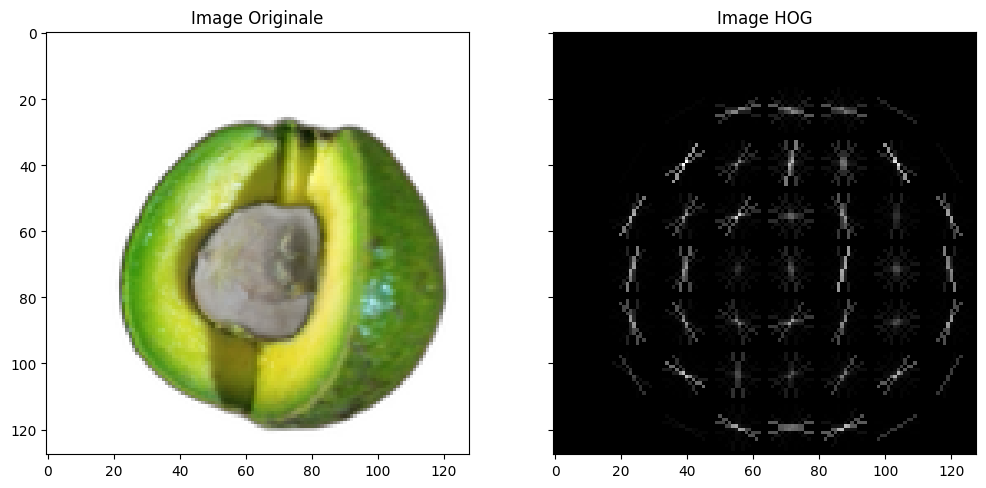

In [37]:
# Visualisation de quelques HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(data["images"][220], cmap='gray')
ax[0].set_title('Image Originale')
ax[1].imshow(hog_images_list[220], cmap='gray')
ax[1].set_title('Image HOG')
plt.show()

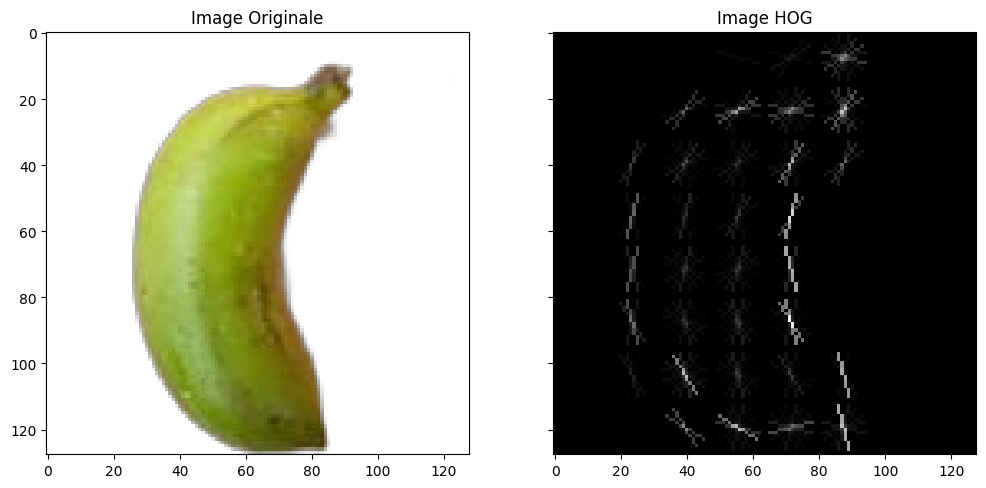

In [38]:
# Visualisation de quelques HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(data["images"][500], cmap='gray')
ax[0].set_title('Image Originale')
ax[1].imshow(hog_images_list[500], cmap='gray')
ax[1].set_title('Image HOG')
plt.show()

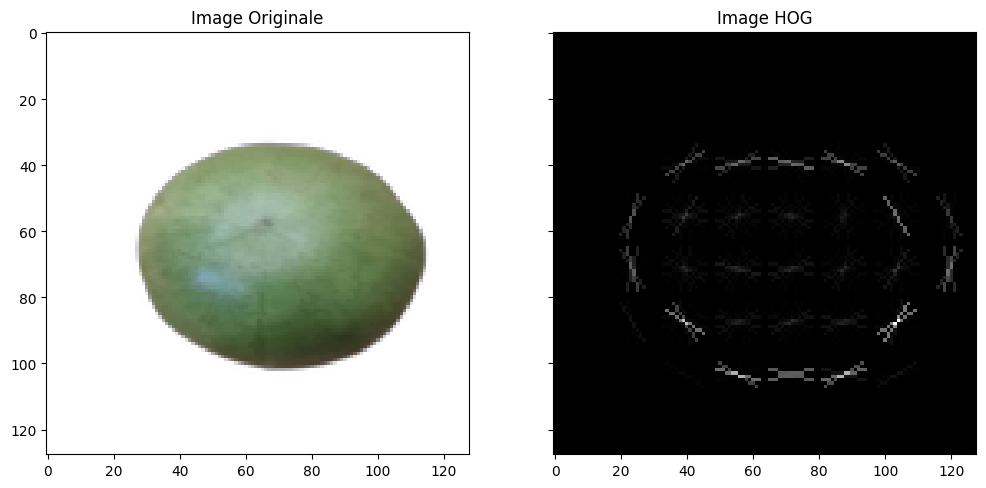

In [39]:
# Visualisation de quelques HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(data["images"][1000], cmap='gray')
ax[0].set_title('Image Originale')
ax[1].imshow(hog_images_list[1000], cmap='gray')
ax[1].set_title('Image HOG')
plt.show()

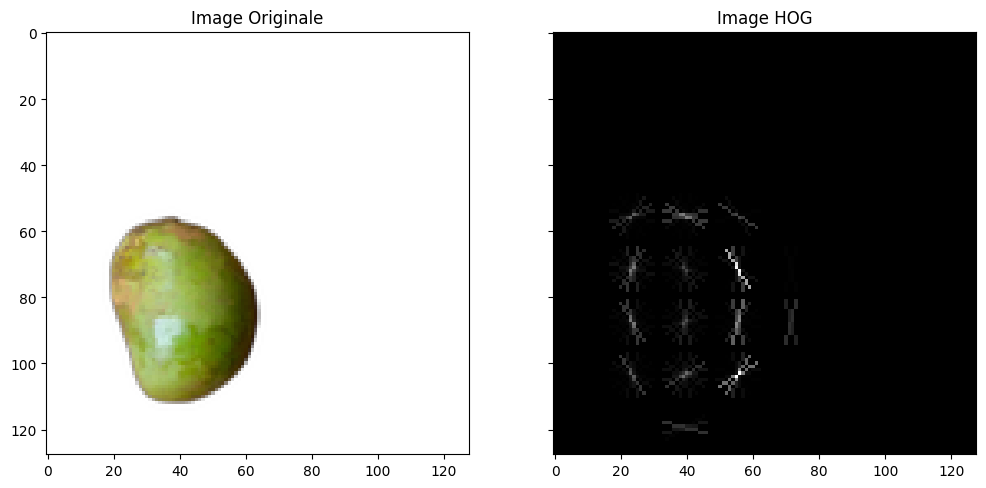

In [40]:
# Visualisation de quelques HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax[0].imshow(data["images"][700], cmap='gray')
ax[0].set_title('Image Originale')
ax[1].imshow(hog_images_list[700], cmap='gray')
ax[1].set_title('Image HOG')
plt.show()

## Sauvegarde du modele

In [41]:
nom_modele = "svm_model.pkl"
joblib.dump(svm_model, nom_modele)

['svm_model.pkl']

### fonction permettant de predire un nouvelle exemple

In [42]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img= img.resize((128, 128))
    
    img = np.array(img)  # Conversion en tableau numpy
    return img

In [43]:
# =============( extraction de caracteristique )==============
def extract_hog_features_for_prediction(image):
    if image.format != "PNG" :
        if image.shape[-1]  == 4:  # Si l'image a 4 canaux (RGBA), convertir en RGB
            image = rgba2rgb(image)
    else:
        image = rgba2rgb(image)
        
    gray_image = rgb2gray(image)
    features, _ = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(2, 2), visualize=True)
    return features

In [44]:
def predict_image_class(image_path, svm_model):
    # =====================( Charger et prétraiter l'image )==================
    image = load_and_preprocess_image(image_path)
    # ===========( Extraire les caractéristiques HOG )======================
    features = extract_hog_features_for_prediction(image)
    
    #=============( Reshape pour respecter l'entrée du modèle )===============
    features = features.reshape(1, -1)
    
    # ==========( Prédire la classe )======================
    prediction = svm_model.predict(features)
    
    # ==========( Retourner le nom de la classe prédite )============
    return prediction[np.argmax(prediction)]





In [45]:

# ===========( Chargement du modèle SVM à partir du fichier )===============
# chemin_du_model = "svm_model_best.pkl"
# model_svm = joblib.load(chemin_du_model)
# model_svm = svm_model

# =============( Exemple d'utilisation )=========================
new_image_path = 'test/banane1.webp'
predicted_class = predict_image_class(new_image_path, model_svm)
print(f'Predicted class:=======[ {predicted_class} ]==========')

NameError: name 'model_svm' is not defined